In [1]:
import pymongo

In [2]:
import StringIO

import pandas as pd
from pandas.tools.plotting import autocorrelation_plot
from pandas.tools.plotting import scatter_matrix

import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
from pymongo import MongoClient

In [4]:
client = MongoClient('10.0.10.121', 27017)
db = client.analyticsdb
collection = db['GSPC']

In [5]:
collection.find_one()

{u'_id': ObjectId('57406355696cf107645e2d6f'),
 u'high': 1914.4599609375,
 u'last': 1907.300048828125,
 u'low': 1907.300048828125,
 u'open': 1911.77001953125,
 u'timeStamp': datetime.datetime(2014, 5, 27, 15, 0)}

In [6]:
closing_data = pd.DataFrame()
last_data = pd.DataFrame()
for name in db.collection_names():
    coll = db[name]
    if coll.count() != 576:
        print name
        continue
    list = [d['last'] for d in coll.find()]
    last_data[name] = list
last_data = last_data.fillna(method='ffill')

Jp6099
Jp6036
Jp1768
Jp6464
Jp4031
Jp6037
Jp6238
Jp3191
Jp9024
Jp1333
Jp8648
Jp8158
Jp2742
Jp7186
Jp2904
Jp6654
Jp4850
Jp3686
Jp6740
Jp2060
Jp3166
Jp4979
Jp3196
Jp1937
Jp6810
Jp3252
Jp8093
Jp2930
Jp3197
Jp3232
Jp6028
Jp6236
Jp8081
Jp7284
Jp6240
TNX
Jp8686
Jp9468
Jp9731
Jp9769
Jp6615
Jp7180
Jp9418
Jp7184
Jp3222
Jp3724
Jp7570
Jp3022
Jp2117
Jp9551
Jp2786
Jp3822
system.indexes
Jp8217
Jp1726
Jp2540
Jp7182
Jp4246
Jp2139
Jp6032
Jp6097
Jp9099
Jp4299
Jp5021
Jp2686
Jp3683
Jp6098
Jp9986
Jp7173
Jp8285
Jp7780
Jp7181
Jp3852
Jp2296
Jp9632
Jp8685
Jp9517
Jp6901
Jp3299
Jp1773
Jp4762
Jp3132
Jp3903
Jp3193
Jp7816
Jp8365
Jp3694
Jp6178
Jp3199
Jp9090
Jp4980
Jp6183
Jp3919
Jp4025
Jp9663
Jp1384
Jp3688
Jp3194
Jp9414
Jp7475


In [7]:
last_data.describe()

,Jp2009,Jp8692,Jp4684,Jp9076,Jp8358,Jp9740,Jp9747,Jp1979,Jp2599,Jp9086,...,Jp4508,Jp7762,Jp5444,Jp2432,Jp9989,Jp3708,Jp8008,Jp3086,Jp6503,Jp9697
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,...,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,712.699653,832.109375,4597.062500,1189.045139,2179.069444,1405.894097,2783.130208,2610.760417,1162.859375,1767.279514,...,1824.199653,819.032986,3016.276042,1840.305556,5918.133681,286.623264,2281.289931,1446.815972,1314.220486,2183.467014
std,43.419111,168.255779,1161.859535,174.759745,319.413281,399.497155,332.538174,316.485837,51.092271,238.316392,...,254.560744,96.388745,328.230940,411.368334,1358.333294,58.646728,422.230682,548.677976,149.477827,398.009262
min,613.000000,533.000000,2911.000000,778.000000,1597.000000,948.000000,1997.000000,1912.000000,1060.000000,1341.000000,...,1377.000000,581.000000,2223.000000,1187.000000,4030.000000,201.000000,1547.000000,630.000000,948.500000,1541.000000
25%,689.000000,690.000000,3572.500000,1056.000000,1920.250000,1140.000000,2594.000000,2380.750000,1122.750000,1558.000000,...,1533.500000,757.000000,2822.750000,1436.000000,4685.000000,228.000000,1916.500000,724.000000,1196.750000,1793.250000
50%,711.000000,790.000000,4662.500000,1193.500000,2164.500000,1294.000000,2777.000000,2605.500000,1156.000000,1730.500000,...,1900.500000,837.000000,3040.000000,1826.500000,5915.000000,277.000000,2297.000000,1464.000000,1301.750000,2180.000000
75%,728.000000,989.000000,5732.500000,1317.500000,2454.500000,1584.000000,2981.250000,2860.250000,1191.000000,1983.000000,...,2039.000000,895.250000,3235.000000,2211.500000,7232.500000,337.000000,2679.250000,1917.000000,1403.125000,2503.750000
max,816.000000,1187.000000,6820.000000,1627.000000,2816.000000,2910.000000,3670.000000,3335.000000,1300.000000,2326.000000,...,2252.000000,999.000000,3750.000000,2665.000000,8730.000000,416.000000,3020.000000,2507.000000,1707.500000,3025.000000


In [8]:
%matplotlib inline

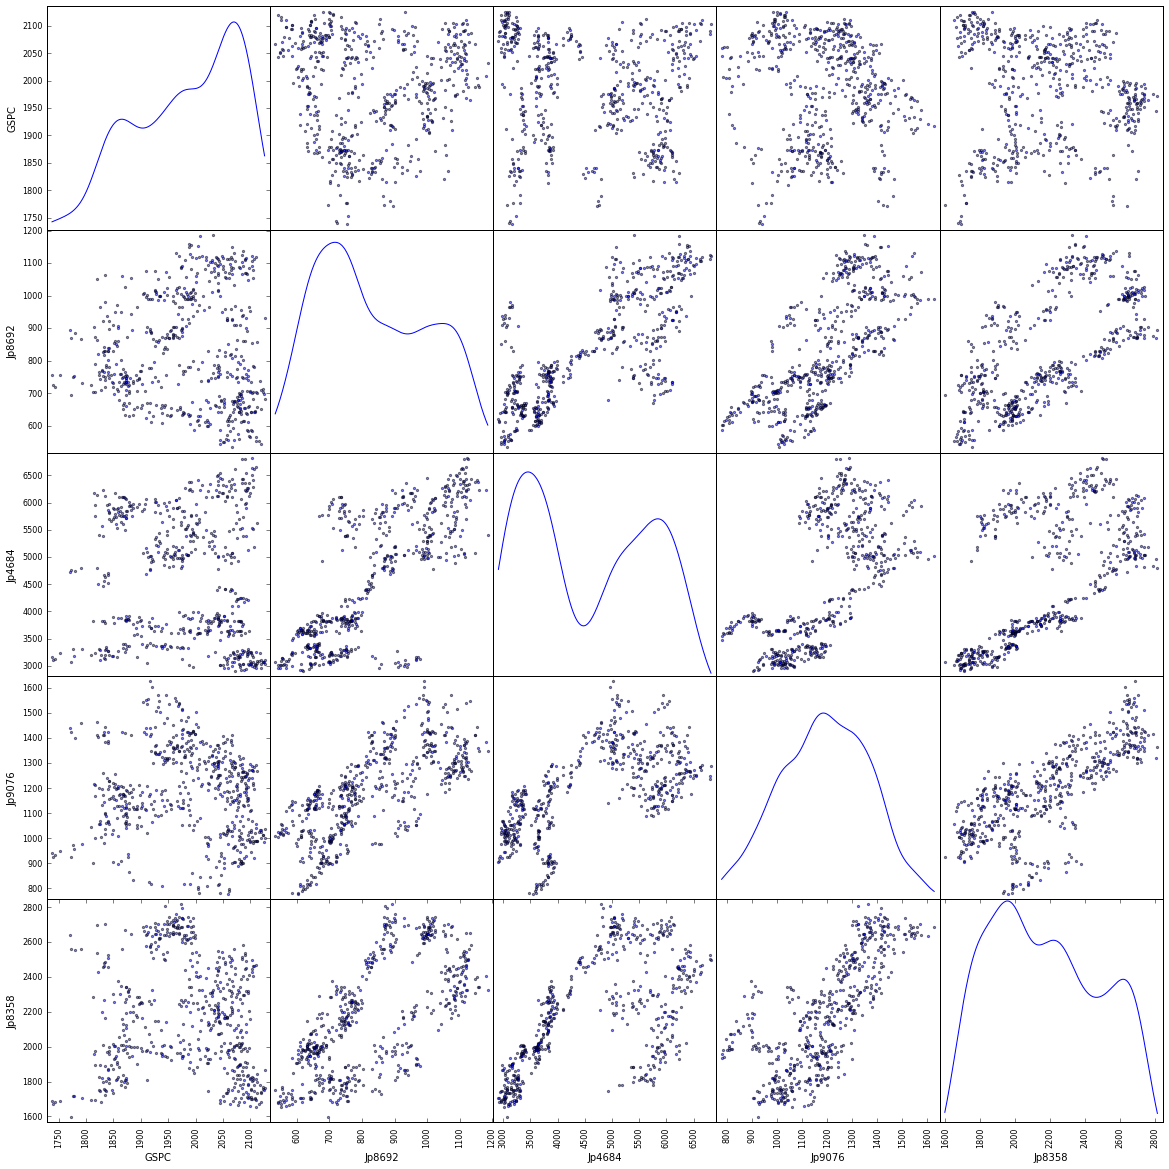

In [9]:
_ = scatter_matrix(pd.concat([last_data['GSPC'],
  last_data['Jp8692'],
  last_data['Jp4684'],
  last_data['Jp9076'],
  last_data['Jp8358']], axis=1), figsize=(20, 20), diagonal='kde')

In [10]:
log_return_data = pd.DataFrame()
for name in last_data.columns.values:
    log_return_data[name] = np.log(last_data[name]/last_data[name].shift())
log_return_data.describe()

,Jp2009,Jp8692,Jp4684,Jp9076,Jp8358,Jp9740,Jp9747,Jp1979,Jp2599,Jp9086,...,Jp4508,Jp7762,Jp5444,Jp2432,Jp9989,Jp3708,Jp8008,Jp3086,Jp6503,Jp9697
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,...,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000
mean,0.000118,0.000564,-0.001126,-0.000036,-0.000198,-0.001349,-0.000173,-0.000135,0.000122,-0.000262,...,-0.000387,0.000563,0.000533,0.000096,-0.001030,-0.000711,-0.000863,-0.000860,0.000142,-0.000460
std,0.012452,0.025674,0.020928,0.021907,0.020436,0.018749,0.018899,0.016898,0.008296,0.018519,...,0.015997,0.020349,0.020780,0.031660,0.020323,0.020982,0.022318,0.035090,0.020629,0.020584
min,-0.055279,-0.098256,-0.103158,-0.119560,-0.074435,-0.101266,-0.080349,-0.062710,-0.036628,-0.092433,...,-0.072216,-0.108518,-0.059852,-0.210528,-0.081376,-0.137022,-0.122164,-0.674511,-0.108308,-0.085472
25%,-0.005666,-0.013438,-0.011846,-0.011983,-0.012135,-0.009266,-0.010199,-0.009906,-0.004039,-0.010366,...,-0.008575,-0.011653,-0.011015,-0.012169,-0.012079,-0.011194,-0.013396,-0.012840,-0.011235,-0.012051
50%,0.000000,0.000000,0.000000,0.001664,-0.000415,-0.000834,0.000000,0.000403,0.000000,0.000000,...,-0.000499,0.001093,0.000343,0.001396,-0.001074,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.004422,0.013952,0.009861,0.013209,0.010179,0.007004,0.009296,0.009045,0.003469,0.009988,...,0.008502,0.012061,0.012507,0.015253,0.010076,0.010772,0.010858,0.012635,0.010420,0.011329
max,0.079917,0.098638,0.084829,0.070826,0.111662,0.077578,0.106387,0.058632,0.041549,0.071480,...,0.062424,0.116119,0.104261,0.227741,0.089823,0.071247,0.083792,0.086305,0.094495,0.088762


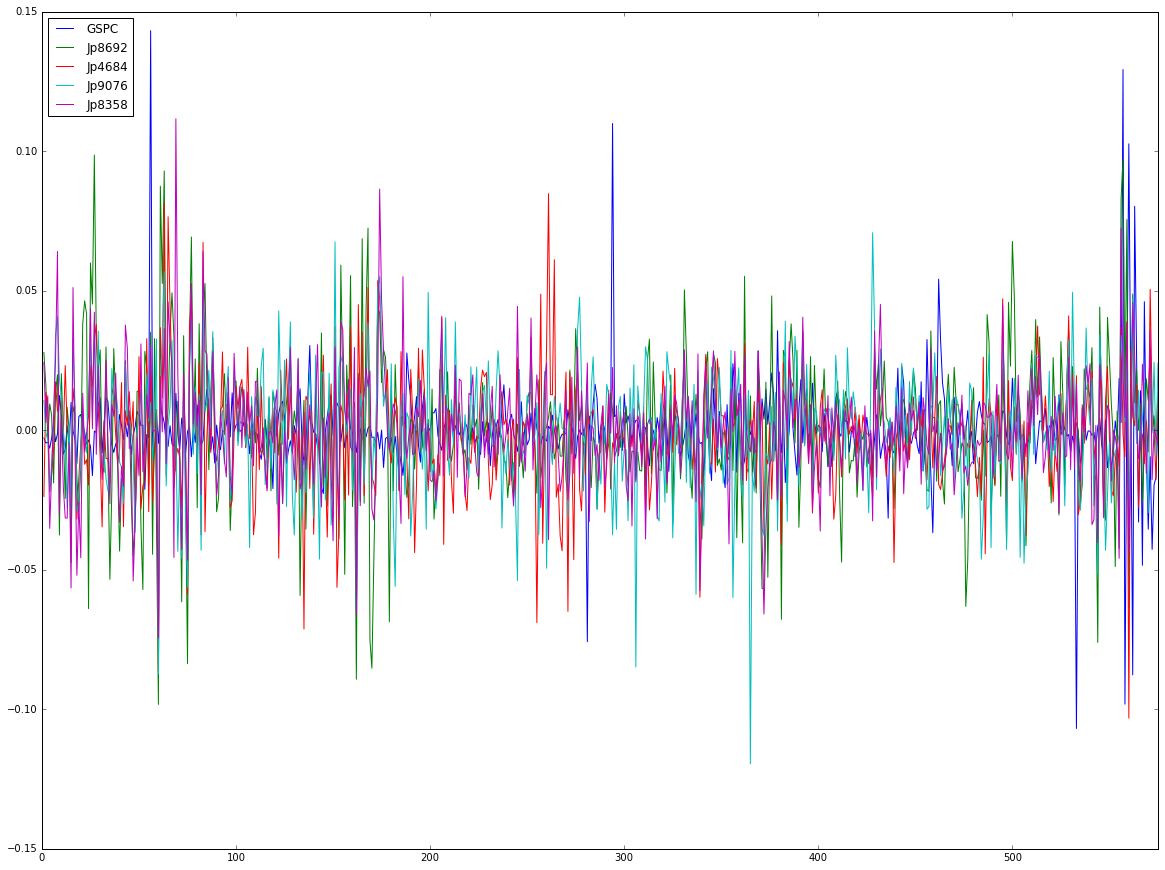

In [11]:
_ = pd.concat([log_return_data['GSPC'],
  log_return_data['Jp8692'],
  log_return_data['Jp4684'],
  log_return_data['Jp9076'],
  log_return_data['Jp8358']], axis=1).plot(figsize=(20, 15))

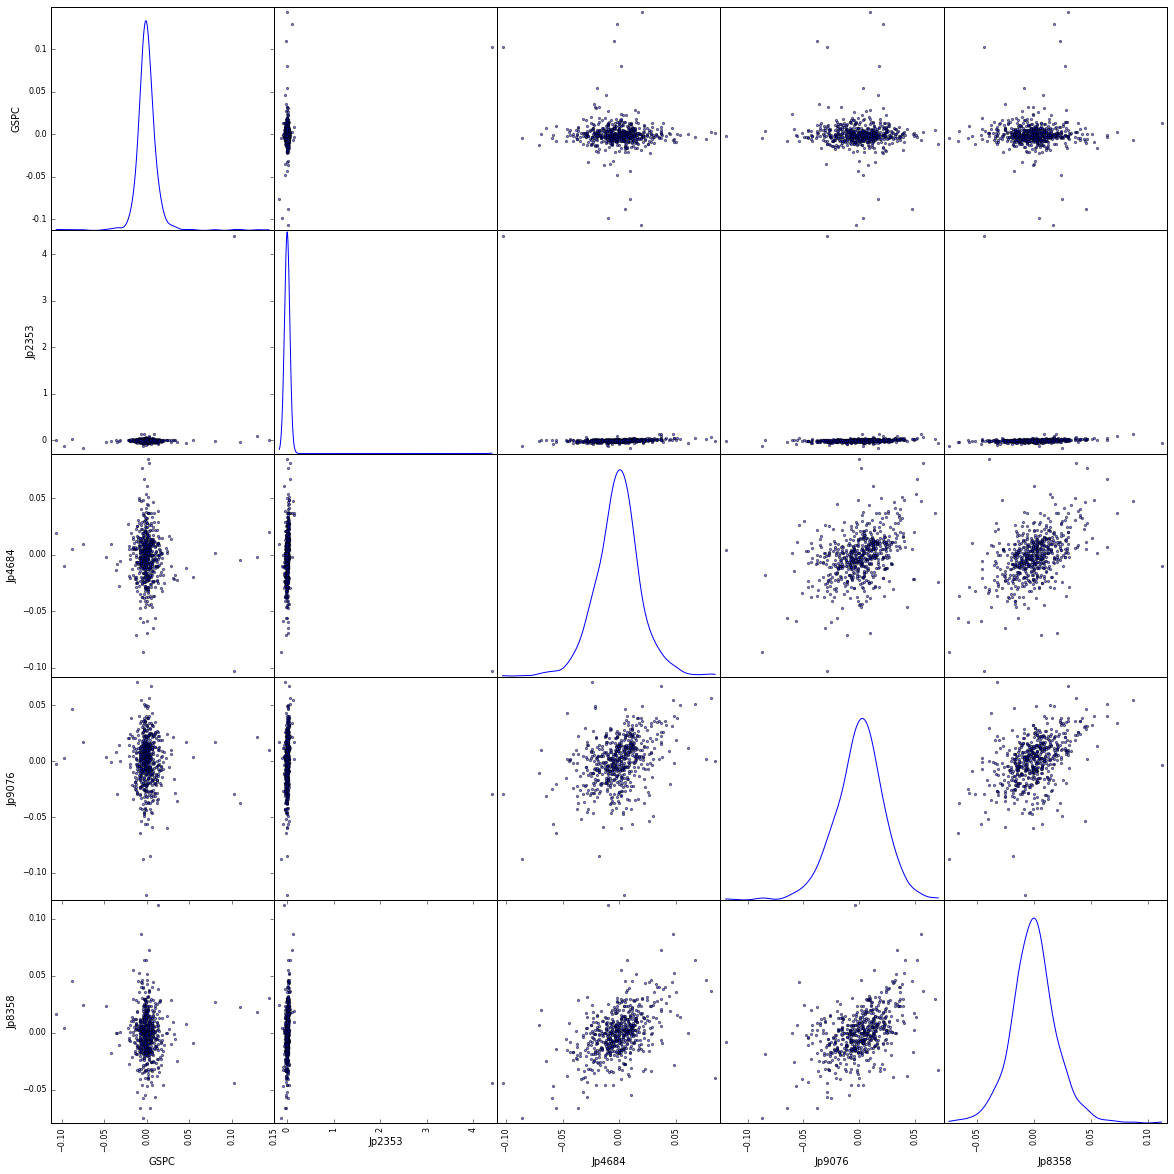

In [12]:
_ = scatter_matrix(pd.concat([log_return_data['GSPC'],
  log_return_data['Jp2353'],
  log_return_data['Jp4684'],
  log_return_data['Jp9076'],
  log_return_data['Jp8358']], axis=1), figsize=(20, 20), diagonal='kde')

In [41]:
tmp = pd.DataFrame()
counter = 0
for name in log_return_data.columns.values:
    if name == 'GSPC':
        data = log_return_data[name]
        idx = counter
    else:
        data = log_return_data[name]
    counter = counter + 1
    tmp[name] = data
sorted_data = tmp.corr().iloc[:,idx].abs().sort_values(ascending=False)

In [42]:
sorted_data[:40].index
predictors_tf = log_return_data[sorted_data[1:40].index]

In [43]:
log_return_data['gspc_log_return_positive'] = 0
log_return_data.ix[log_return_data['GSPC'] >= 0, 'gspc_log_return_positive'] = 1
log_return_data['gspc_log_return_negative'] = 0
log_return_data.ix[log_return_data['GSPC'] < 0, 'gspc_log_return_negative'] = 1
classes_tf = pd.DataFrame()
classes_tf['gspc_log_return_positive'] = log_return_data['gspc_log_return_positive']
classes_tf['gspc_log_return_negative'] = log_return_data['gspc_log_return_negative']
log_return_data.drop('gspc_log_return_positive', axis=1, inplace=True)
log_return_data.drop('gspc_log_return_negative', axis=1, inplace=True)

In [46]:
training_set_size = int(len(predictors_tf) * 0.8)
test_set_size = len(predictors_tf) - training_set_size

training_predictors_tf = predictors_tf[1:training_set_size]
training_classes_tf = classes_tf[1:training_set_size]
test_predictors_tf = predictors_tf[training_set_size:]
test_classes_tf = classes_tf[training_set_size:]

#training_predictors_tf.describe()
training_predictors_tf.values

array([[ 0.00816331,  0.00046136,  0.03789087, ...,  0.02507095,
        -0.03351472,  0.        ],
       [ 0.00809721,  0.00872566,  0.04215183, ...,  0.01907415,
         0.00974209, -0.00899894],
       [ 0.        , -0.00183066, -0.01132088, ...,  0.00672497,
        -0.01228339, -0.01136376],
       ..., 
       [-0.01666705,  0.00261097, -0.08441734, ...,  0.00853144,
        -0.03461361, -0.00339944],
       [ 0.00836825, -0.00391901, -0.02094317, ...,  0.        ,
         0.01920498,  0.00339944],
       [ 0.0165293 ,  0.        ,  0.00527706, ..., -0.00730819,
        -0.00701211,  0.00113058]])

In [47]:
def tf_confusion_metrics(model, actual_classes, session, feed_dict):
  predictions = tf.argmax(model, 1)
  actuals = tf.argmax(actual_classes, 1)

  ones_like_actuals = tf.ones_like(actuals)
  zeros_like_actuals = tf.zeros_like(actuals)
  ones_like_predictions = tf.ones_like(predictions)
  zeros_like_predictions = tf.zeros_like(predictions)

  tp_op = tf.reduce_sum(
    tf.cast(
      tf.logical_and(
        tf.equal(actuals, ones_like_actuals), 
        tf.equal(predictions, ones_like_predictions)
      ), 
      "float"
    )
  )

  tn_op = tf.reduce_sum(
    tf.cast(
      tf.logical_and(
        tf.equal(actuals, zeros_like_actuals), 
        tf.equal(predictions, zeros_like_predictions)
      ), 
      "float"
    )
  )

  fp_op = tf.reduce_sum(
    tf.cast(
      tf.logical_and(
        tf.equal(actuals, zeros_like_actuals), 
        tf.equal(predictions, ones_like_predictions)
      ), 
      "float"
    )
  )

  fn_op = tf.reduce_sum(
    tf.cast(
      tf.logical_and(
        tf.equal(actuals, ones_like_actuals), 
        tf.equal(predictions, zeros_like_predictions)
      ), 
      "float"
    )
  )

  tp, tn, fp, fn = \
    session.run(
      [tp_op, tn_op, fp_op, fn_op], 
      feed_dict
    )

  tpr = float(tp)/(float(tp) + float(fn))
  fpr = float(fp)/(float(tp) + float(fn))

  accuracy = (float(tp) + float(tn))/(float(tp) + float(fp) + float(fn) + float(tn))

  recall = tpr
  precision = float(tp)/(float(tp) + float(fp))
  
  f1_score = (2 * (precision * recall)) / (precision + recall)
  
  print 'Precision = ', precision
  print 'Recall = ', recall
  print 'F1 Score = ', f1_score
  print 'Accuracy = ', accuracy

In [51]:
# Define variables for the number of predictors and number of classes to remove magic numbers from our code.
num_predictors = len(training_predictors_tf.columns) # 24 in the default case
num_classes = len(training_classes_tf.columns) # 2 in the default case

def inference(feature_data):
    with tf.name_scope('inference') as scope:
        W = tf.Variable(tf.truncated_normal([num_predictors, num_classes], stddev=0.0001))
        b = tf.Variable(tf.ones([num_classes]))
        y = tf.nn.softmax(tf.matmul(feature_data, W) + b)
        w_hist = tf.histogram_summary("weights", W)
        b_hist = tf.histogram_summary("biases", b)
        y_hist = tf.histogram_summary("y", y)
        return y

def loss(model, actual_classes):
    with tf.name_scope('loss') as scope:
        cross_entropy = -tf.reduce_sum(actual_classes * tf.log(model))
        tf.scalar_summary("entropy", cross_entropy)
        return cross_entropy

def training(loss):
    with tf.name_scope('training') as scope:
        train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss)
        return train_step


with tf.Graph().as_default():
    feature_data = tf.placeholder("float", [None, num_predictors], name="feature_data_placeholder")
    actual_classes = tf.placeholder("float", [None, num_classes], name="actual_classes_placeholder")
    feed_dict={
        feature_data: training_predictors_tf.values, 
        actual_classes: training_classes_tf.values.reshape(len(training_classes_tf.values), 2)
    }
    model = inference(feature_data)
    loss = loss(model, actual_classes)
    training_op = training(loss)
    summary_op = tf.merge_all_summaries()
    init = tf.initialize_all_variables()
    with tf.Session() as sess:
        summary_writer = tf.train.SummaryWriter('data', graph_def=sess.graph_def)
        sess.run(init)
        for step in range(70000):
            sess.run(training_op, feed_dict=feed_dict)
            if step % 5000 == 0:
                print sess.run(loss, feed_dict=feed_dict)
                summary_str = sess.run(summary_op, feed_dict=feed_dict)
                summary_writer.add_summary(summary_str, step)
        feed_dict= {
          feature_data: test_predictors_tf.values,
          actual_classes: test_classes_tf.values.reshape(len(test_classes_tf.values), 2)
        }
        tf_confusion_metrics(model, actual_classes, sess, feed_dict)

318.146
306.368
301.04
297.184
294.372
292.278
290.685
289.48
288.571
287.888
287.368
286.957
286.63
286.377
Precision =  0.621951219512
Recall =  0.761194029851
F1 Score =  0.684563758389
Accuracy =  0.594827586207


In [53]:
# Define variables for the number of predictors and number of classes to remove magic numbers from our code.
num_predictors = len(training_predictors_tf.columns) # 24 in the default case
num_classes = len(training_classes_tf.columns) # 2 in the default case

def inference(feature_data):
    with tf.name_scope('inference') as scope:
        weights1 = tf.Variable(tf.truncated_normal([num_predictors, 50], stddev=0.0001))
        biases1 = tf.Variable(tf.ones([50]))

        weights2 = tf.Variable(tf.truncated_normal([50, 25], stddev=0.0001))
        biases2 = tf.Variable(tf.ones([25]))
                     
        weights3 = tf.Variable(tf.truncated_normal([25, 2], stddev=0.0001))
        biases3 = tf.Variable(tf.ones([2]))

        hidden_layer_1 = tf.nn.relu(tf.matmul(feature_data, weights1) + biases1)
        hidden_layer_2 = tf.nn.relu(tf.matmul(hidden_layer_1, weights2) + biases2)
        y = tf.nn.softmax(tf.matmul(hidden_layer_2, weights3) + biases3)
        w_hist1 = tf.histogram_summary("weights1", weights1)
        b_hist1 = tf.histogram_summary("biases1", biases1)
        w_hist2 = tf.histogram_summary("weights2", weights2)
        b_hist2 = tf.histogram_summary("biases2", biases2)
        w_hist3 = tf.histogram_summary("weights3", weights3)
        b_hist3 = tf.histogram_summary("biases3", biases3)
        hidden_layer_1_hist = tf.histogram_summary("hidden_layer_1", hidden_layer_1)
        hidden_layer_2_hist = tf.histogram_summary("hidden_layer_2", hidden_layer_2)
        y_hist = tf.histogram_summary("y", y)
        return y

def loss(model, actual_classes):
    with tf.name_scope('loss') as scope:
        cross_entropy = -tf.reduce_sum(actual_classes * tf.log(model))
        tf.scalar_summary("entropy", cross_entropy)
        return cross_entropy

def training(loss):
    with tf.name_scope('training') as scope:
        train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss)
        return train_step


with tf.Graph().as_default():
    feature_data = tf.placeholder("float", [None, num_predictors], name="feature_data_placeholder")
    actual_classes = tf.placeholder("float", [None, num_classes], name="actual_classes_placeholder")
    feed_dict={
        feature_data: training_predictors_tf.values, 
        actual_classes: training_classes_tf.values.reshape(len(training_classes_tf.values), 2)
    }
    model = inference(feature_data)
    loss = loss(model, actual_classes)
    training_op = training(loss)
    summary_op = tf.merge_all_summaries()
    init = tf.initialize_all_variables()
    with tf.Session() as sess:
        summary_writer = tf.train.SummaryWriter('data2', graph_def=sess.graph_def)
        sess.run(init)
        for step in range(70000):
            sess.run(training_op, feed_dict=feed_dict)
            if step % 5000 == 0:
                print sess.run(loss, feed_dict=feed_dict)
                summary_str = sess.run(summary_op, feed_dict=feed_dict)
                summary_writer.add_summary(summary_str, step)
        feed_dict= {
          feature_data: test_predictors_tf.values,
          actual_classes: test_classes_tf.values.reshape(len(test_classes_tf.values), 2)
        }
        tf_confusion_metrics(model, actual_classes, sess, feed_dict)

318.007
285.935
285.933
285.933
285.933
285.933
285.932
285.932
285.932
285.932
285.932
285.932
285.932
285.933
Precision =  0.645569620253
Recall =  0.761194029851
F1 Score =  0.698630136986
Accuracy =  0.620689655172
